In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

set_config(display='diagram')

In [3]:
df = pd.read_excel("delta_new.xlsx")
df.head()

df1 = pd.read_excel("omikron_new.xlsx")
df1.head()

,Location,cases,deaths,Variant,Total Floor Space,Residential Settlement (% of area of floor space),Industrial and Commercial Settlement (%),"Sports, leisure, recreation (%)",Other (%),Traffic/Transport (%),...,Water Bodies (%),Total Population,Female,Male,(Female) % of Population,(Male) % of Population,(Female) % of Foreigner's Population,(Male) % of Foreigner's Population,% of Total Population,Inhabitants \nper km2
0,Ahrweiler,37218,46,Omikron,78703,3.206993,0.998691,1.644156,1.288388,6.741801,...,1.617473,130479,66135,64344,50.686317,49.313683,46.391909,53.608091,10.079017,165.788477
1,Altenkirchen,40946,52,Omikron,64238,6.149008,1.628320,0.899779,1.460195,5.683552,...,0.891995,129087,65144,63943,50.465190,49.534810,46.036202,53.963798,8.003130,200.949965
2,Alzey-Worms,45668,88,Omikron,58807,3.451970,1.226045,1.816110,1.947047,7.143707,...,1.591647,130715,65751,64964,50.301037,49.698963,45.440613,54.559387,9.983552,222.278045
3,Bad Dürkheim,41895,63,Omikron,59464,3.713171,1.072918,2.097067,1.439526,5.034979,...,0.662586,133004,67901,65103,51.051848,48.948152,47.748691,52.251309,8.616282,223.672048
4,Bad Kreuznach,64308,91,Omikron,86389,3.283983,1.325400,1.862506,1.842827,5.801665,...,0.971188,158746,81197,77549,51.149005,48.850995,48.613890,51.386110,11.020750,183.756662


In [4]:
df

,Location,cases,deaths,Variant,Total Floor Space,Residential Settlement (% of area of floor space),Industrial and Commercial Settlement (%),"Sports, leisure, recreation (%)",Other (%),Traffic/Transport (%),...,Water Bodies (%),Total Population,Female,Male,(Female) % of Population,(Male) % of Population,(Female) % of Foreigner's Population,(Male) % of Foreigner's Population,% of Total Population,Inhabitants \nper km2
0,Ahrweiler,8141,82,Delta,78703,3.206993,0.998691,1.644156,1.288388,6.741801,...,1.617473,130479,66135,64344,50.686317,49.313683,46.391909,53.608091,10.079017,165.788477
1,Altenkirchen,8503,115,Delta,64238,6.149008,1.628320,0.899779,1.460195,5.683552,...,0.891995,129087,65144,63943,50.465190,49.534810,46.036202,53.963798,8.003130,200.949965
2,Alzey-Worms,9568,154,Delta,58807,3.451970,1.226045,1.816110,1.947047,7.143707,...,1.591647,130715,65751,64964,50.301037,49.698963,45.440613,54.559387,9.983552,222.278045
3,Bad Dürkheim,8375,185,Delta,59464,3.713171,1.072918,2.097067,1.439526,5.034979,...,0.662586,133004,67901,65103,51.051848,48.948152,47.748691,52.251309,8.616282,223.672048
4,Bad Kreuznach,10015,154,Delta,86389,3.283983,1.325400,1.862506,1.842827,5.801665,...,0.971188,158746,81197,77549,51.149005,48.850995,48.613890,51.386110,11.020750,183.756662
5,Bernkastel-Wittlich,5780,74,Delta,116792,2.059216,1.198712,1.113946,1.361395,6.318070,...,1.443592,112685,56263,56422,49.929449,50.070551,45.341716,54.658284,10.868350,96.483267
6,Birkenfeld,5943,117,Delta,77683,2.744487,0.801977,1.364520,1.975979,4.644517,...,0.538084,80830,40743,40087,50.405790,49.594210,47.975232,52.024768,9.990103,104.051310
7,Bitburg-Prüm,5538,46,Delta,162695,1.752973,0.752328,0.882019,1.504041,5.724823,...,0.607886,100055,49571,50484,49.543751,50.456249,47.275874,52.724126,14.437060,61.498695
8,Cochem-Zell,3563,84,Delta,69243,1.916439,0.813079,1.246335,1.413861,5.905290,...,1.750357,61578,30720,30858,49.887947,50.112053,48.636457,51.363543,7.920036,88.930105
9,Donnersbergkreis,4540,89,Delta,64541,2.554965,0.780899,1.205435,1.815900,5.162610,...,0.639903,75539,38122,37417,50.466646,49.533354,46.857052,53.142948,8.297701,117.040826


In [5]:
df['Location'] =  df['Location'].astype(str) + ' (delta)'

df1['Location'] =  df1['Location'].astype(str) + ' (omikron)' 



In [6]:
combine = df.append(df1, ignore_index=True)
combine = combine.sort_values(by = ["Location"],ascending=True)

combine['Variant'] = combine['Variant'].map({'Delta': 1, 'Omikron': 2})


C:\Users\nishi\AppData\Local\Temp\ipykernel_2480\4197235037.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine = df.append(df1, ignore_index=True)


In [7]:
combine.head()



,Location,cases,deaths,Variant,Total Floor Space,Residential Settlement (% of area of floor space),Industrial and Commercial Settlement (%),"Sports, leisure, recreation (%)",Other (%),Traffic/Transport (%),...,Water Bodies (%),Total Population,Female,Male,(Female) % of Population,(Male) % of Population,(Female) % of Foreigner's Population,(Male) % of Foreigner's Population,% of Total Population,Inhabitants \nper km2
0,Ahrweiler (delta),8141,82,1,78703,3.206993,0.998691,1.644156,1.288388,6.741801,...,1.617473,130479,66135,64344,50.686317,49.313683,46.391909,53.608091,10.079017,165.788477
36,Ahrweiler (omikron),37218,46,2,78703,3.206993,0.998691,1.644156,1.288388,6.741801,...,1.617473,130479,66135,64344,50.686317,49.313683,46.391909,53.608091,10.079017,165.788477
1,Altenkirchen (delta),8503,115,1,64238,6.149008,1.628320,0.899779,1.460195,5.683552,...,0.891995,129087,65144,63943,50.465190,49.534810,46.036202,53.963798,8.003130,200.949965
37,Altenkirchen (omikron),40946,52,2,64238,6.149008,1.628320,0.899779,1.460195,5.683552,...,0.891995,129087,65144,63943,50.465190,49.534810,46.036202,53.963798,8.003130,200.949965
2,Alzey-Worms (delta),9568,154,1,58807,3.451970,1.226045,1.816110,1.947047,7.143707,...,1.591647,130715,65751,64964,50.301037,49.698963,45.440613,54.559387,9.983552,222.278045


In [8]:
combine.info()

#combines = combine

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 59
Data columns (total 23 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Location                                           72 non-null     object 
 1   cases                                              72 non-null     int64  
 2   deaths                                             72 non-null     int64  
 3   Variant                                            72 non-null     int64  
 4   Total Floor Space                                  72 non-null     int64  
 5   Residential Settlement (% of area of floor space)  72 non-null     float64
 6   Industrial and Commercial Settlement (%)           72 non-null     float64
 7   Sports, leisure, recreation  (%)                   72 non-null     float64
 8   Other (%)                                          72 non-null     float64
 9   Traffic/Tran

In [9]:
combine = combine.drop(["Female", "Male", "Water Bodies  (%)","Others (%)", "Other (%)", "Sports, leisure, recreation  (%)","Traffic/Transport (%)",
                        "Forest (%)"   ],axis=1)

combines = combine  

In [10]:
from scipy.stats import chi2_contingency
factors_paired = [(i,j) for i in combine.columns.values for j in combine.columns.values] 

chi2, p_values =[], []

for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(df[f[0]], df[f[1]]))   
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:      # for same factor pair
        chi2.append(0)
        p_values.append(0)
n_features = len(combine.columns)
chi2 = np.array(chi2).reshape((n_features, n_features)) # shape it as a matrix
chi2 = pd.DataFrame(chi2, index=combine.columns.values, columns=combine.columns.values) # then a df for convenience
# p values is what will help us to decide dependency or independency
p_values = np.array(p_values).reshape((n_features, n_features))
p_values = pd.DataFrame(p_values, index=combine.columns.values, columns=combine.columns.values)

In [11]:
print(p_values)

                                                   Location     cases  \
Location                                           0.000000  0.237638   
cases                                              0.237638  0.000000   
deaths                                             0.247037  0.247037   
Variant                                            1.000000  1.000000   
Total Floor Space                                  0.237638  0.237638   
Residential Settlement (% of area of floor space)  0.237638  0.237638   
Industrial and Commercial Settlement (%)           0.237638  0.237638   
Agriculture  (%)                                   0.237638  0.237638   
Total Population                                   0.237638  0.237638   
(Female) % of Population                           0.237638  0.237638   
(Male) % of Population                             0.237638  0.237638   
(Female) % of Foreigner's Population               0.237638  0.237638   
(Male) % of Foreigner's Population                 

In [12]:
1 - p_values

,Location,cases,deaths,Variant,Total Floor Space,Residential Settlement (% of area of floor space),Industrial and Commercial Settlement (%),Agriculture (%),Total Population,(Female) % of Population,(Male) % of Population,(Female) % of Foreigner's Population,(Male) % of Foreigner's Population,% of Total Population,Inhabitants \nper km2
Location,1.000000,0.762362,0.752963,0.0,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362
cases,0.762362,1.000000,0.752963,0.0,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362
deaths,0.752963,0.752963,1.000000,0.0,0.752963,0.752963,0.752963,0.752963,0.752963,0.752963,0.752963,0.752963,0.752963,0.752963,0.752963
Variant,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Total Floor Space,0.762362,0.762362,0.752963,0.0,1.000000,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362
Residential Settlement (% of area of floor space),0.762362,0.762362,0.752963,0.0,0.762362,1.000000,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362
Industrial and Commercial Settlement (%),0.762362,0.762362,0.752963,0.0,0.762362,0.762362,1.000000,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362
Agriculture (%),0.762362,0.762362,0.752963,0.0,0.762362,0.762362,0.762362,1.000000,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362
Total Population,0.762362,0.762362,0.752963,0.0,0.762362,0.762362,0.762362,0.762362,1.000000,0.762362,0.762362,0.762362,0.762362,0.762362,0.762362
(Female) % of Population,0.762362,0.762362,0.752963,0.0,0.762362,0.762362,0.762362,0.762362,0.762362,1.000000,0.762362,0.762362,0.762362,0.762362,0.762362


In [13]:
combines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 59
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Location                                           72 non-null     object 
 1   cases                                              72 non-null     int64  
 2   deaths                                             72 non-null     int64  
 3   Variant                                            72 non-null     int64  
 4   Total Floor Space                                  72 non-null     int64  
 5   Residential Settlement (% of area of floor space)  72 non-null     float64
 6   Industrial and Commercial Settlement (%)           72 non-null     float64
 7   Agriculture  (%)                                   72 non-null     float64
 8   Total Population                                   72 non-null     int64  
 9   (Female) % o

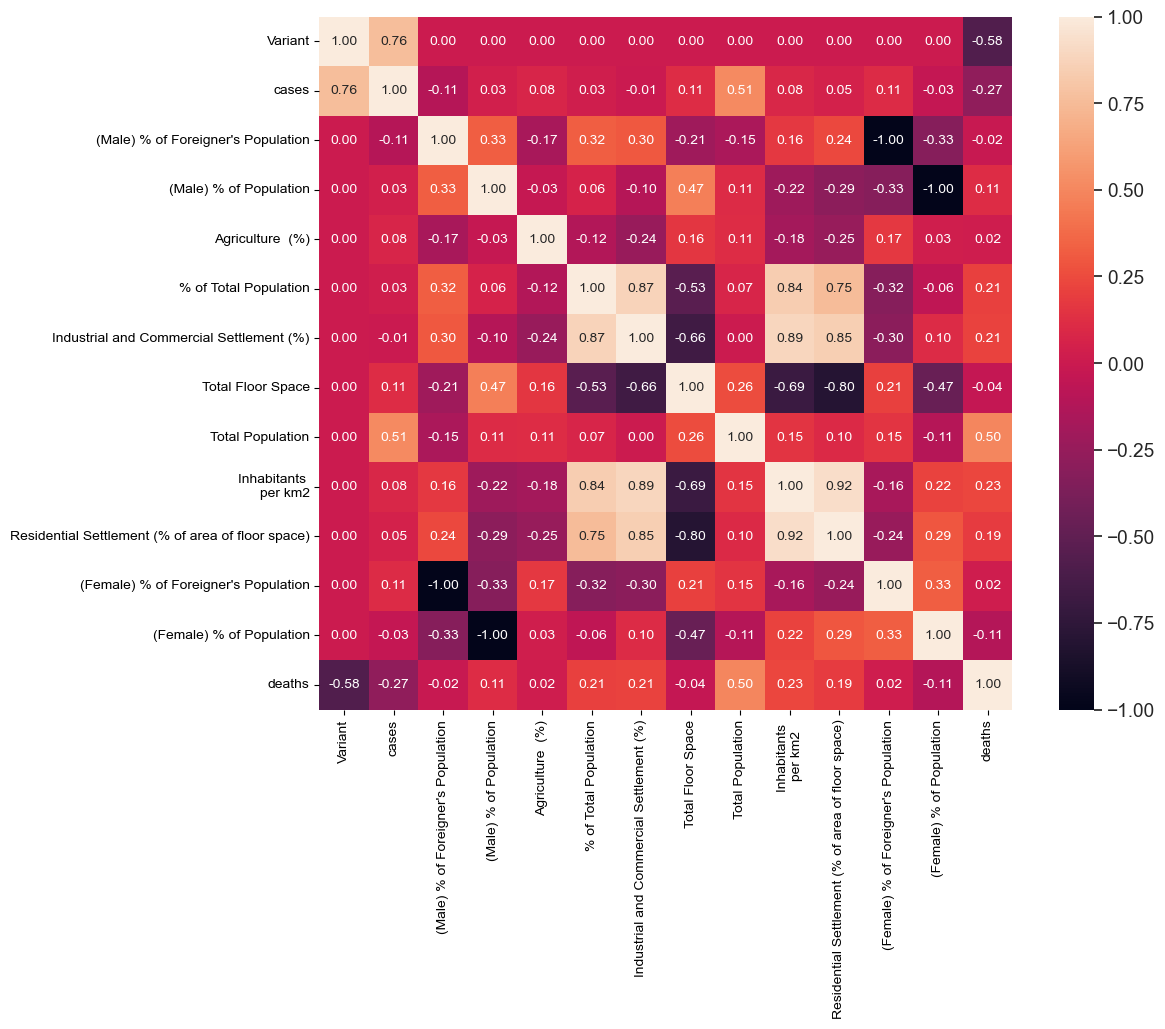

In [14]:
#correlation matrix among all variables
corrmat = combines.corr()
f, ax = plt.subplots(figsize=(12, 9))

k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Variant')['Variant'].index
cm = np.corrcoef(combines[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

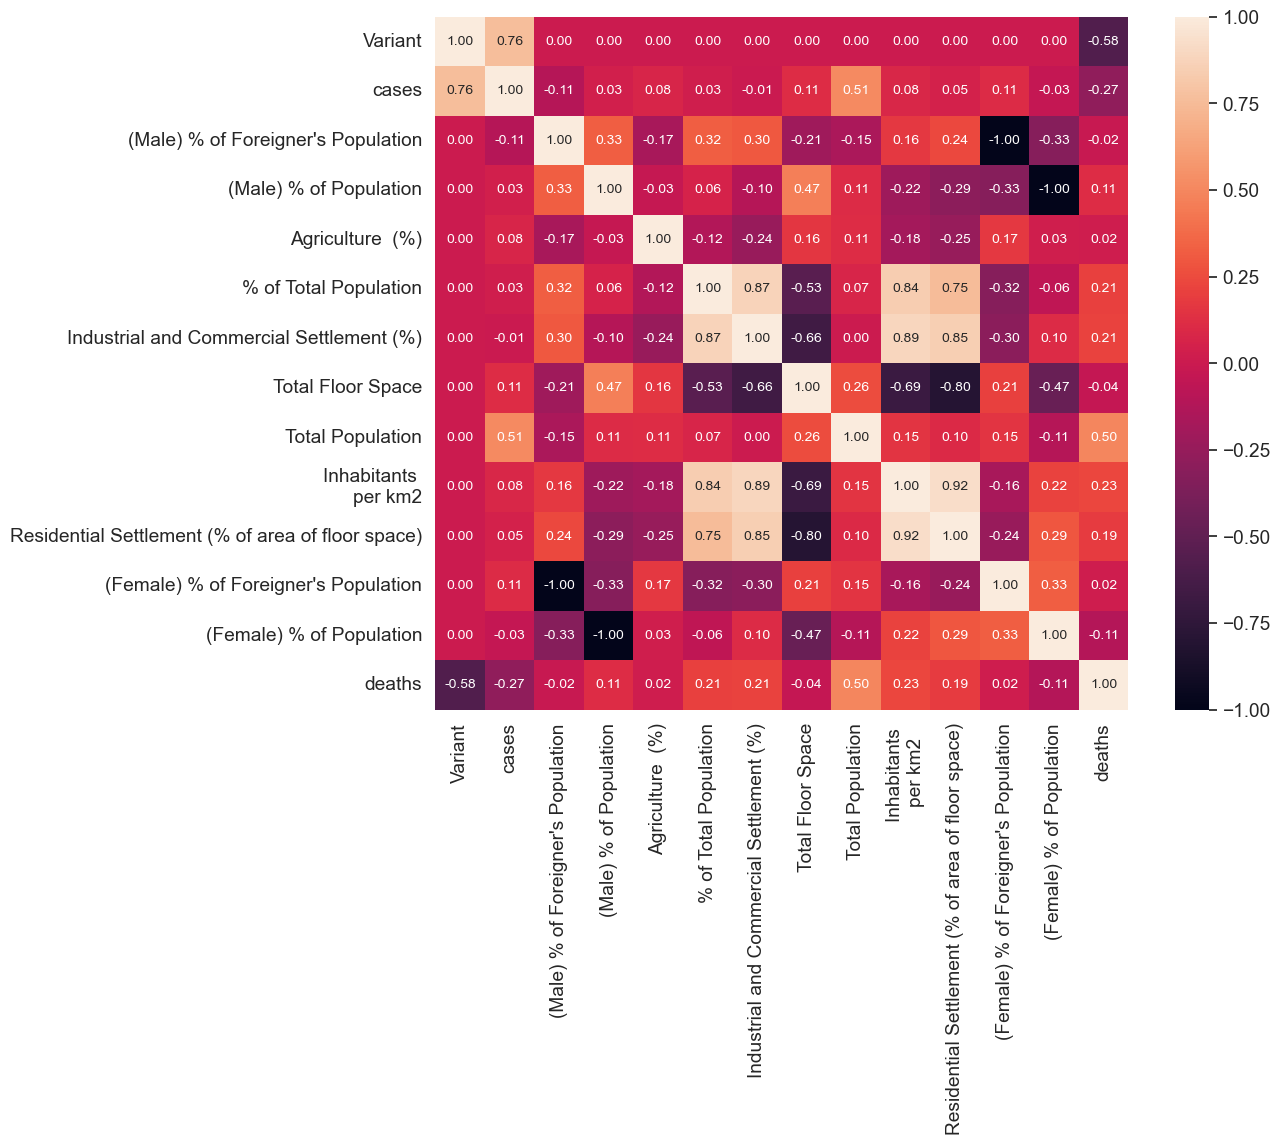

In [15]:
#Pearson co-relation

corrmat = combines.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 9))

k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Variant')['Variant'].index
cm = np.corrcoef(combines[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

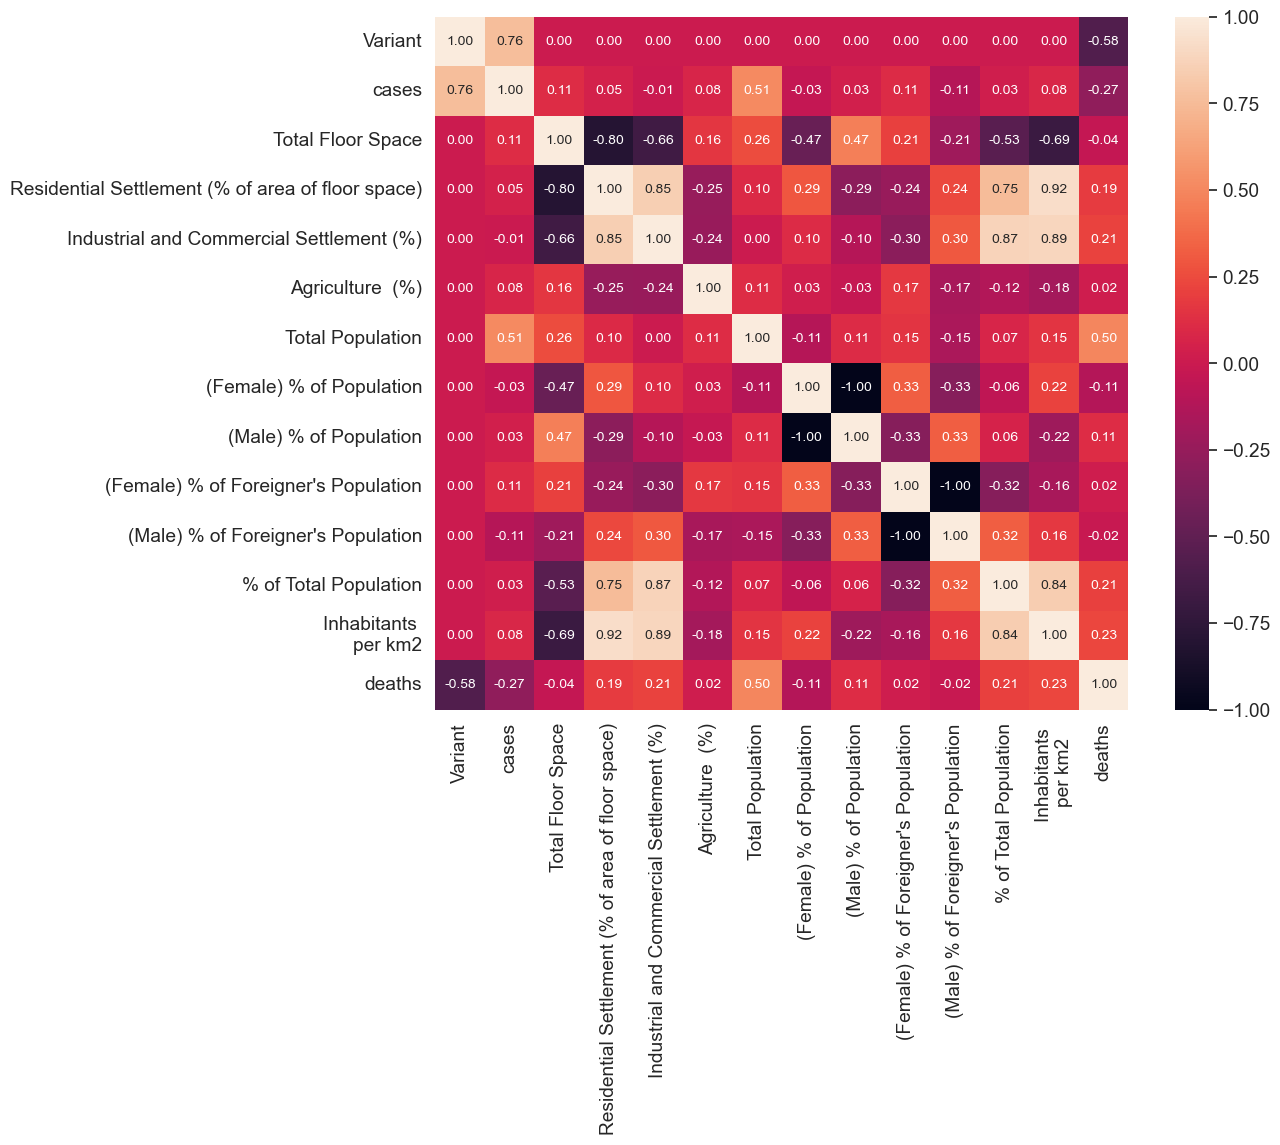

In [16]:
#Spearman co-relation

corrmat = combines.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 9))

k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Variant')['Variant'].index
cm = np.corrcoef(combines[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

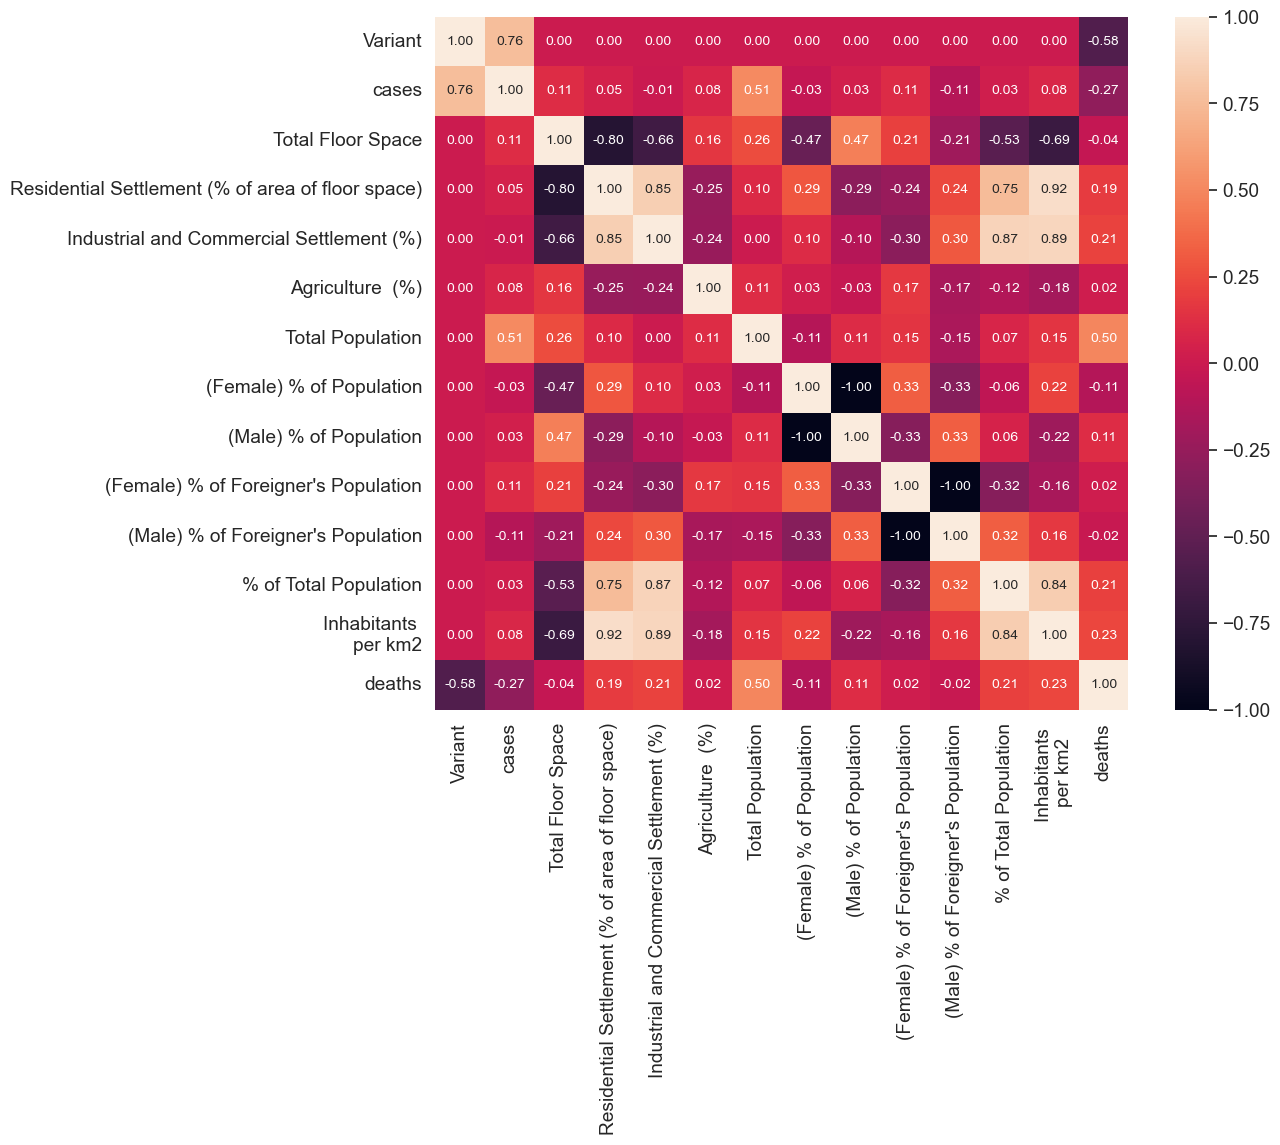

In [17]:
#Method kendall tau

corrmat = combines.corr(method='kendall')
f, ax = plt.subplots(figsize=(12, 9))

k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Variant')['Variant'].index
cm = np.corrcoef(combines[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [18]:
y= combines["Variant"]

x = combines.drop(["Location", "Variant"],axis=1)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state = 42)

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
tf.random.set_seed(0)

# generate the data
X, y = make_classification(n_classes=2, n_features=15, n_informative=4, n_redundant=0, random_state=42)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(15,)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, input_dim=1, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# fit the model
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy', 'AUC'])
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), validation_batch_size=64, verbose=0)

# extract the predicted probabilities
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
#print(p_pred.round(2))

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
#print(y_pred)

#print(confusion_matrix(y_test, y_pred))


print(classification_report(y_test, y_pred))

1/1 [==============================] - 0s 175ms/step
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.60      0.55      0.57        11

    accuracy                           0.64        25
   macro avg       0.63      0.63      0.63        25
weighted avg       0.64      0.64      0.64        25



In [21]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.44
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        14
           1       0.36      0.36      0.36        11

    accuracy                           0.44        25
   macro avg       0.43      0.43      0.43        25
weighted avg       0.44      0.44      0.44        25



In [22]:
#fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]

p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
#print(p_pred.round(2))

y_pred = np.where(p_pred > 0.5, 1, 0)
#print(y_pred)

#print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.50      0.64      0.56        11

    accuracy                           0.56        25
   macro avg       0.57      0.57      0.56        25
weighted avg       0.58      0.56      0.56        25



In [31]:
#fit gradient boosted model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]


p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
#print(p_pred.round(2))

y_pred = np.where(p_pred > 0.5, 1, 0)
#print(y_pred)

#print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

#from sklearn.metrics import classification_report
 
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81        14
           1       0.86      0.55      0.67        11

    accuracy                           0.76        25
   macro avg       0.79      0.74      0.74        25
weighted avg       0.78      0.76      0.75        25



In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.6
              precision    recall  f1-score   support

           0       0.62      0.71      0.67        14
           1       0.56      0.45      0.50        11

    accuracy                           0.60        25
   macro avg       0.59      0.58      0.58        25
weighted avg       0.59      0.60      0.59        25



In [24]:
# Import libraries needed in this example:
from sklearn.linear_model import BayesianRidge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from numpy import sqrt

# Define the BayesianRidge model with default parameters: 
bay_ridge = BayesianRidge()

# Fit the model with trained Bayesian data:
bay_ridge.fit(X_train, y_train)


# Predict the test data and check for accuracy: 
y_predict = bay_ridge.predict(X_test)

p_pred = y_predict.flatten()
#print(p_pred.round(2))

y_pred = np.where(p_pred > 0.5, 1, 0)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.50      0.64      0.56        11

    accuracy                           0.56        25
   macro avg       0.57      0.57      0.56        25
weighted avg       0.58      0.56      0.56        25

